## 0. Cities in Sweden

In [2]:
import pandas as pd

df_cities = pd.DataFrame({"Kommun": ["Malmö", "Stockholm", "Uppsala", "Göteborg"], "Population": [347949, 975551, 233839, 583056]}, index=range(4))
df_cities

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


### a)

In [3]:
for c in df_cities["Kommun"]:
    print(c)

Malmö
Stockholm
Uppsala
Göteborg


### b)

In [4]:
df_cities[df_cities["Kommun"] == "Göteborg"]

,Kommun,Population
3,Göteborg,583056


### c)

In [5]:
df_cities.sort_values("Population", ascending=False)

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


### d)

In [6]:
df_cities.sort_values("Population", ascending=False)[:3]

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


### e)

In [7]:
swe_pop = 10379295

df_cities["Population %"] = [round((p/swe_pop)*100, 2) for p in df_cities["Population"]]

df_cities

,Kommun,Population,Population %
0,Malmö,347949,3.35
1,Stockholm,975551,9.40
2,Uppsala,233839,2.25
3,Göteborg,583056,5.62


## 1. Cities in Sweden

### a)

In [8]:
df_big_cities = pd.read_excel("../data/komtopp50_2020.xlsx", sheet_name="Totalt", skiprows=6)
df_big_cities.head()

,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


In [9]:
df_big_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2020        290 non-null    int64  
 1   2019        290 non-null    int64  
 2   Unnamed: 2  290 non-null    object 
 3   2020.1      290 non-null    int64  
 4   2019.1      290 non-null    int64  
 5   %           290 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 13.7+ KB


### b)

In [10]:
df_big_cities.columns=["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]
df_big_cities.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


### c)

In [11]:
df_big_cities.sort_values("Rang 2020")

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1,Stockholm,975551,974073,0.151734
57,2,2,Göteborg,583056,579281,0.651670
134,3,3,Malmö,347949,344166,1.099179
241,4,4,Uppsala,233839,230767,1.331213
124,5,5,Linköping,164616,163051,0.959822
...,...,...,...,...,...,...
271,286,286,Åsele,2805,2794,0.393701
5,287,287,Arjeplog,2718,2785,-2.405745
29,288,288,Dorotea,2498,2551,-2.077617
194,289,289,Sorsele,2442,2489,-1.888309


### d)

In [12]:
df_big_cities.sort_values("Rang 2020", ascending=False)[:5]

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
12,290,290,Bjurholm,2387,2408,-0.872093
194,289,289,Sorsele,2442,2489,-1.888309
29,288,288,Dorotea,2498,2551,-2.077617
5,287,287,Arjeplog,2718,2785,-2.405745
271,286,286,Åsele,2805,2794,0.393701


### e)

In [18]:
total_2019 = 0
total_2020 = 0

for p1, p2 in zip(df_big_cities["Folkmängd 2019"], df_big_cities["Folkmängd 2020"]):
    total_2019 += p1
    total_2020 += p2

total_2019, total_2020

(10327589, 10379295)

### f)

<Axes: xlabel='Kommun'>

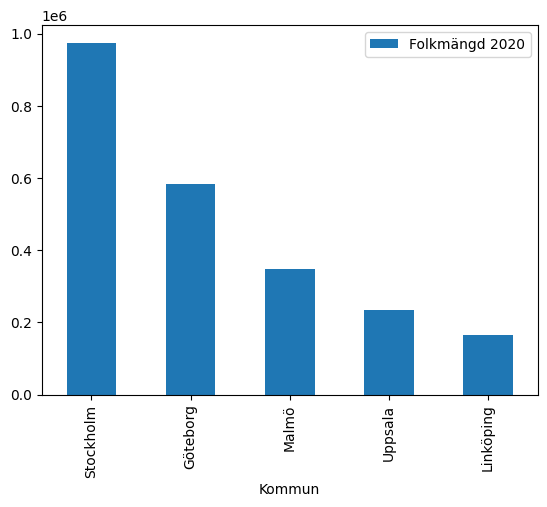

In [31]:
df_big_cities.nlargest(5, ["Folkmängd 2020"]).plot(kind="bar", x="Kommun", y="Folkmängd 2020")

<Axes: xlabel='Kommun'>

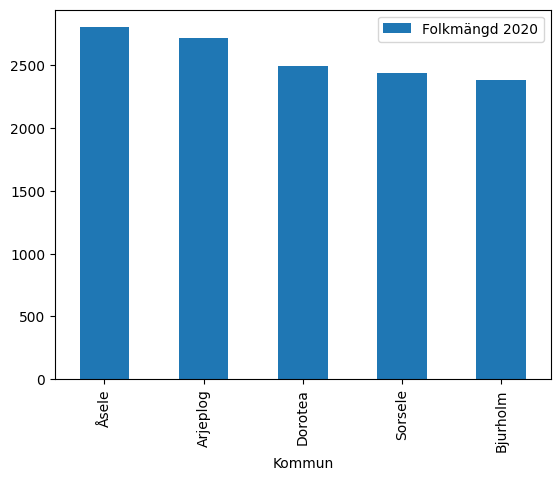

In [34]:
df_big_cities.nsmallest(5, ["Folkmängd 2020"]).sort_values("Folkmängd 2020", ascending=False).plot(kind="bar", x="Kommun", y="Folkmängd 2020")

## 2. Cities in Sweden - gender

In [50]:
df_big_cities_men = pd.read_excel("../data/komtopp50_2020.xlsx", sheet_name="Män", skiprows=6)
df_big_cities_men.columns=["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]
df_big_cities_men["Kön"] = "Man"
df_big_cities_men.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,81,83,Ale,16256,16054,1.258253,Man
1,64,64,Alingsås,20702,20646,0.271239,Man
2,122,123,Alvesta,10367,10339,0.270819,Man
3,255,255,Aneby,3503,3498,0.142939,Man
4,169,168,Arboga,7094,7114,-0.281136,Man


In [58]:
df_big_cities_women = pd.read_excel("../data/komtopp50_2020.xlsx", sheet_name="Kvinnor", skiprows=6)
df_big_cities_women.columns=["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]
df_big_cities_women["Kön"] = "Kvinna"
df_big_cities_women["Förändring"] = pd.to_numeric(df_big_cities_women["Förändring"], errors="coerce")
df_big_cities_women.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,84,85,Ale,15612,15348,1.720094,Kvinna
1,64,64,Alingsås,20900,20774,0.606527,Kvinna
2,123,123,Alvesta,9857,9795,0.632976,Kvinna
3,255,255,Aneby,3318,3350,-0.955224,Kvinna
4,165,164,Arboga,6945,6973,-0.401549,Kvinna


In [59]:
df_big_cities_women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rang 2020       290 non-null    int64  
 1   Rang 2019       290 non-null    int64  
 2   Kommun          290 non-null    object 
 3   Folkmängd 2020  290 non-null    int64  
 4   Folkmängd 2019  290 non-null    int64  
 5   Förändring      289 non-null    float64
 6   Kön             290 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 16.0+ KB


In [60]:
df_big_cities_men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rang 2020       290 non-null    int64  
 1   Rang 2019       290 non-null    int64  
 2   Kommun          290 non-null    object 
 3   Folkmängd 2020  290 non-null    int64  
 4   Folkmängd 2019  290 non-null    int64  
 5   Förändring      290 non-null    float64
 6   Kön             290 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 16.0+ KB


In [71]:
df_big_cities_gender = pd.concat([df_big_cities_men, df_big_cities_women], axis="rows").set_index("Kommun")

df_big_cities_gender

,Rang 2020,Rang 2019,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
Kommun,,,,,,
Ale,81,83,16256,16054,1.258253,Man
Alingsås,64,64,20702,20646,0.271239,Man
Alvesta,122,123,10367,10339,0.270819,Man
Aneby,255,255,3503,3498,0.142939,Man
Arboga,169,168,7094,7114,-0.281136,Man
...,...,...,...,...,...,...
Österåker,55,57,22997,22442,2.473042,Kvinna
Östhammar,117,118,10846,10803,0.398038,Kvinna
Östra Göinge,160,159,7270,7262,0.110162,Kvinna
